In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [3]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'
COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

FRAMEWORK_ORDER = ['WinUI', 'WinAPI', 'GDIplus', 'Direct3D', 'Direct2D', 'Blend2D', 'Cairo', 'FLTK', 'Java2D', 'JavaSwing','Qt5', 'Qt6', 'pyqt5', 'pyqt6', 'pyqt6_quick', 'tkinter', 'wxpython', 'wxpython_d2d', 'SDL2_Direct3D', 'SDL2_OpenGLES', 'SDL2_OpenGL', 'SDL2_Software', 'pygame', 'pyglet', 'GTK', 'GLUT', 'GLEW', 'SFML', 'Skia']

In [4]:
PATH = "../data/finals_frameworks"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [5]:
file_data = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [6]:
data = data[data['complexity'] == 'default']

In [7]:
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.291,13.603,4.887,6.404
1,1,1,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.327,14.641,6.417,5.910
2,2,2,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.633,13.950,5.467,6.166
3,3,3,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.471,14.785,6.739,5.732
4,4,4,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.277,13.592,5.210,6.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,1821,wxpython,default,wxpython_default,small,5.0,windup,7.160,0.349,3.979,3.181
196,196,196,1821,wxpython,default,wxpython_default,small,5.0,windup,7.675,0.171,4.351,3.324
197,197,197,1821,wxpython,default,wxpython_default,small,5.0,windup,8.868,0.342,5.154,3.714
198,198,198,1821,wxpython,default,wxpython_default,small,5.0,windup,8.365,1.033,4.916,3.449


In [8]:
# remove negative diff, failed validation
data = data[data['diff'] > 0]  

# remove absolute outliers
data = data.loc[~((data['framework'] == 'GDIplus') & (data['program'] == 'getpixel') & (data['diff'] > 7))] 
data = data.loc[~((data['framework'] == 'Skia') & (data['program'] == 'windup') & (data['diff'] < 0))] 

# remove based on program validation (z-value removal)
#  {'program': 'getpixel', 'framework': 'GTK'},
#  {'program': 'getpixel', 'framework': 'pyglet'},
#  {'program': 'windup', 'framework': 'Java2D'},
#  {'program': 'windup', 'framework': 'JavaSwing'},
#  {'program': 'windup', 'framework': 'pygame'},
#  {'program': 'windup', 'framework': 'pyqt6_quick'},
#  {'program': 'windup', 'framework': 'SDL2_Direct3D'}
data = data.loc[~((data['framework'] == 'GTK') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'pyglet') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'Java2D') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'JavaSwing') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pygame') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pyqt6_quick') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'SDL2_Direct3D') & (data['program'] == 'windup'))]


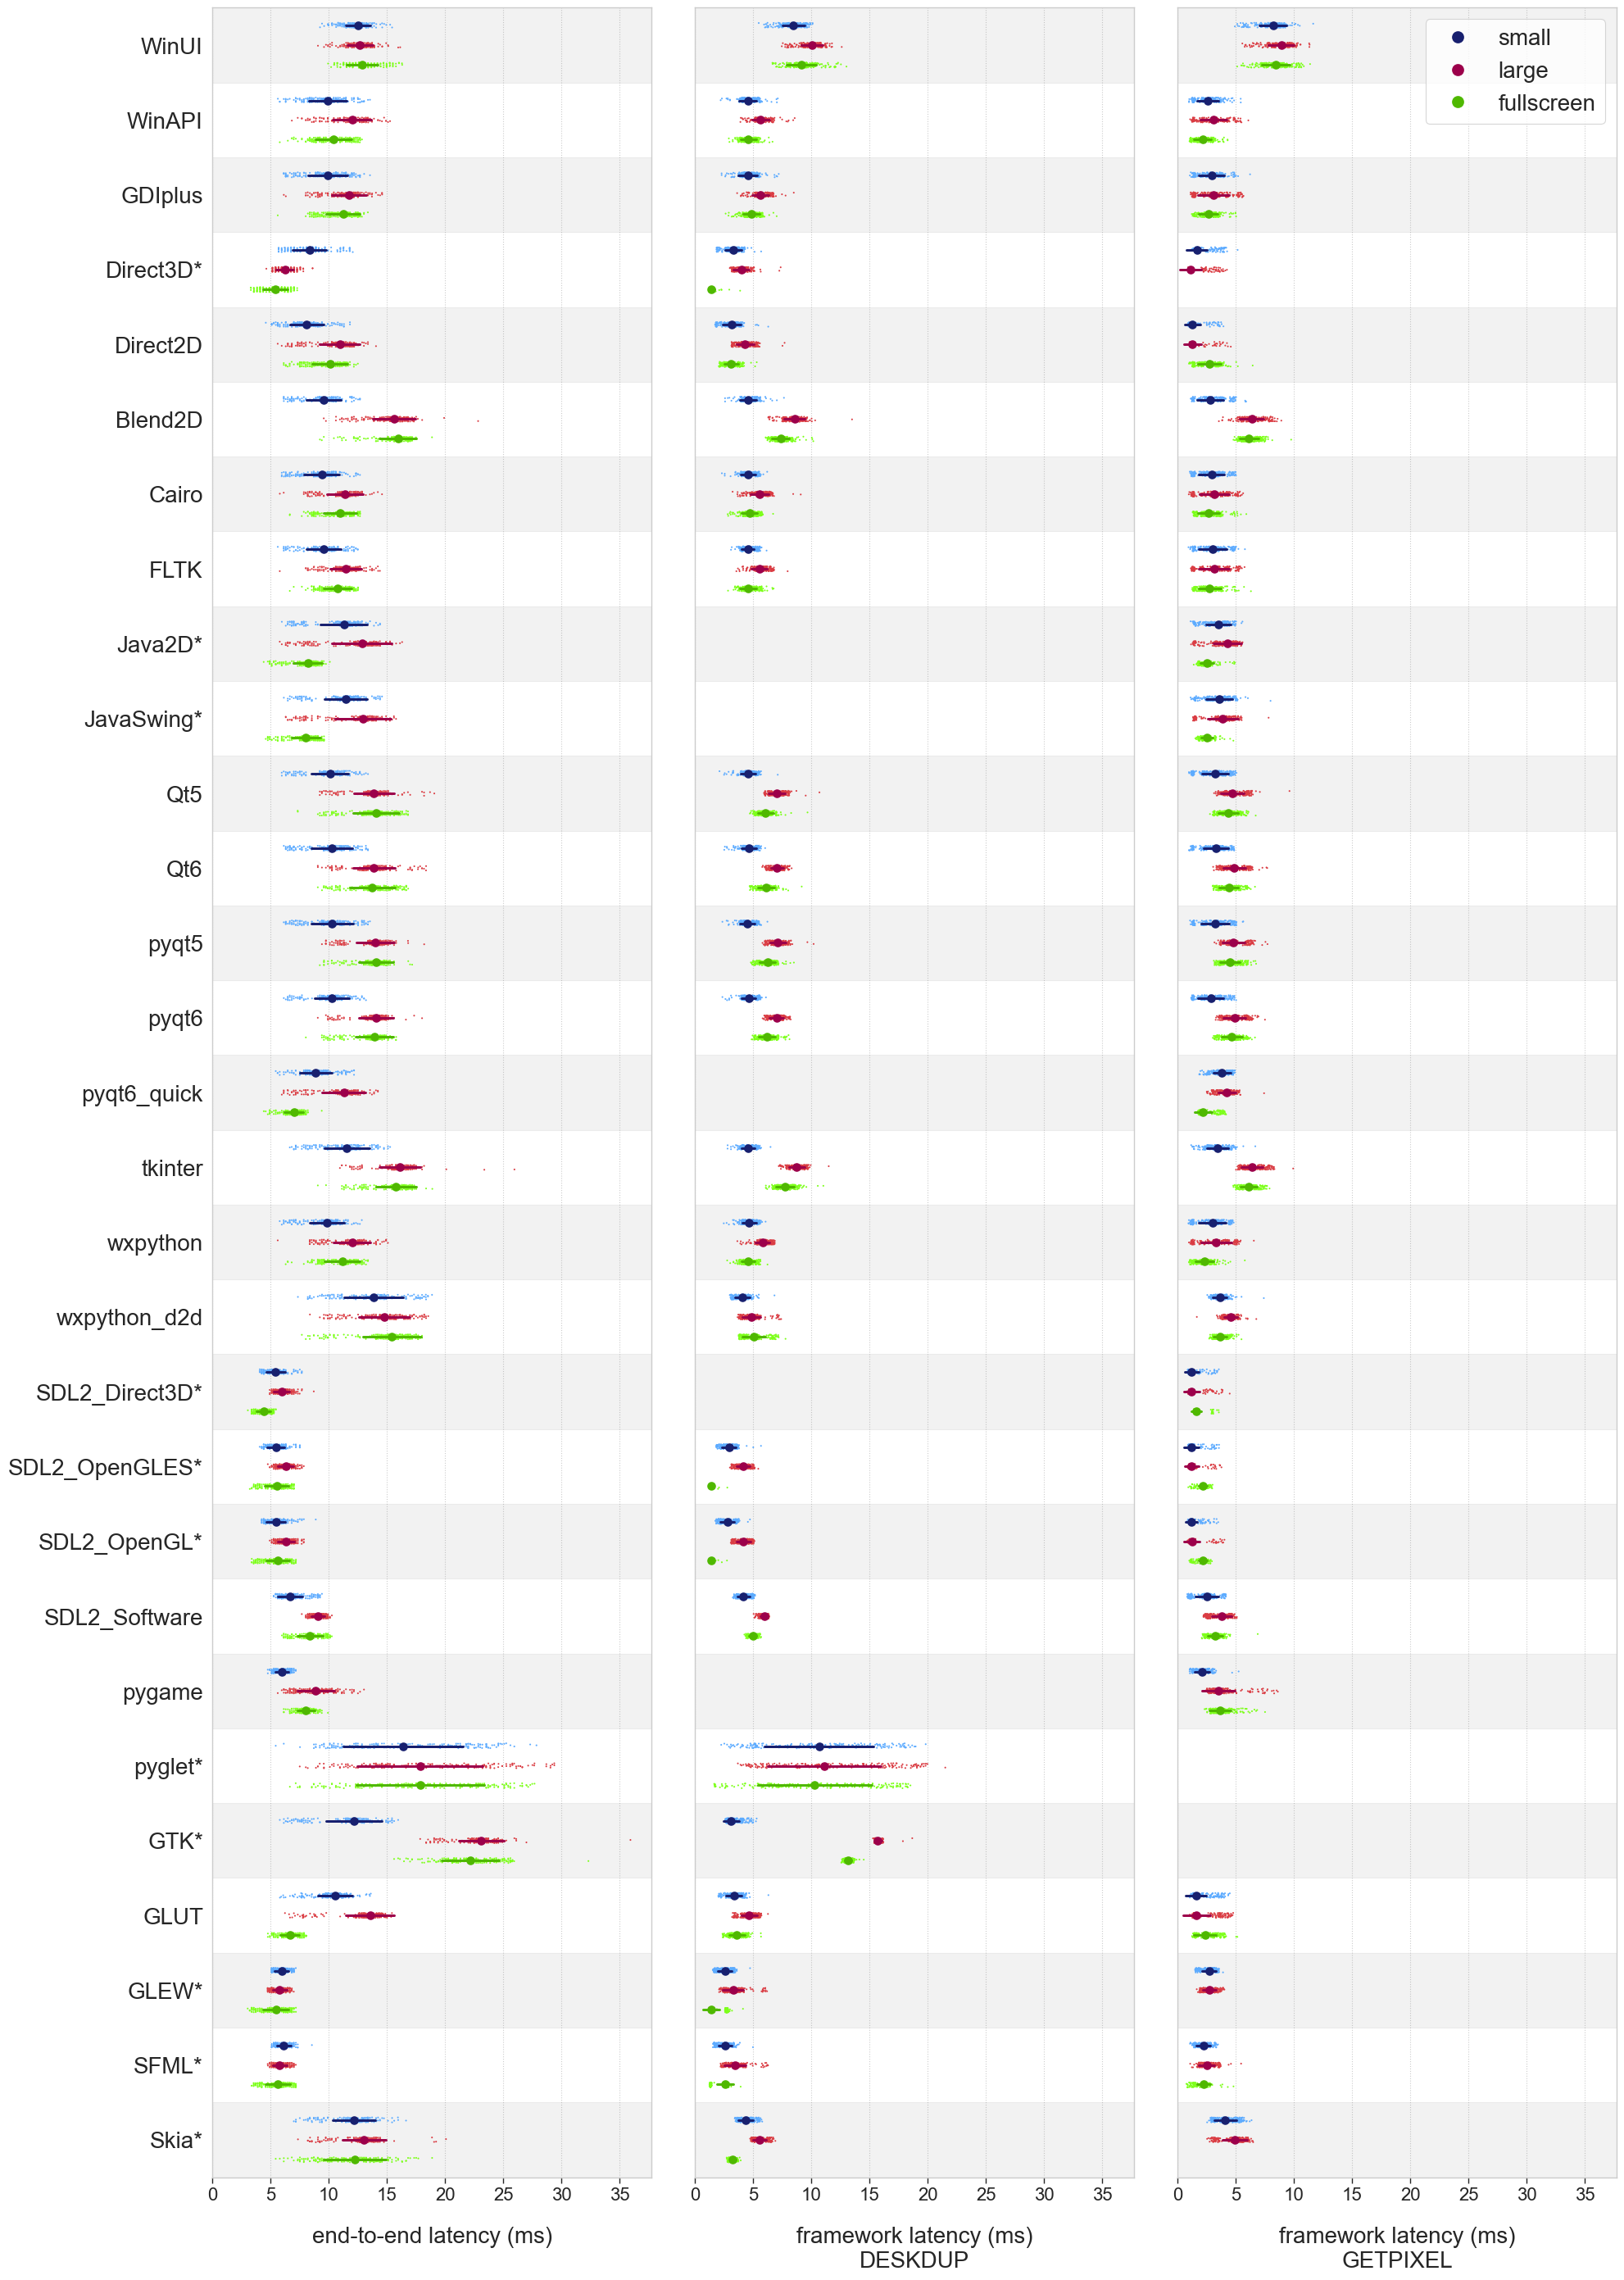

In [9]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(5, 15), "xtick.bottom": True, "grid.linestyle": ":"})

fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)


# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[2].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[2].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot_0 = sns.stripplot(ax=axs[0], data=data[data['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER, hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_GREEN], legend=False, zorder=1)
plot = sns.stripplot(ax=axs[1], data=data[(data['program'] == 'windup') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_GREEN], legend=False, zorder=1)
plot = sns.stripplot(ax=axs[2], data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_GREEN], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'none'], x='ete_upper', y='framework', order=FRAMEWORK_ORDER, hue='fullscreen', hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_DARKGREEN], legend=False, dodge=0.52, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data[(data['program'] == 'windup') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='fullscreen', hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_DARKGREEN], legend=False, dodge=0.52, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[2], data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001)], x='fw', y='framework', order=FRAMEWORK_ORDER, hue='fullscreen', hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_DARKGREEN], dodge=0.52, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)


modified_labels = []
for ticklabel in plot_0.get_yticklabels():
    text = ticklabel.get_text()
    is_fse = data[(data['framework'] == text) & (data['program'] != 'none') & (data['fullscreen'] == 'fullscreen')]['fullscreen_mode'].iloc[0] == 3.0
    if is_fse:
        text_modified = f'{text}*'
        ticklabel.set_text(text_modified)
    else:
        ticklabel.set_text(text)
    modified_labels.append(ticklabel)
plot_0.set_yticklabels(modified_labels)


# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[2].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("./figures/size.pdf", format='pdf', bbox_inches='tight')

In [10]:
# for framework in FRAMEWORK_ORDER:
#     print(framework, data[(data['fullscreen'] == 'fullscreen') & (data['framework'] == framework) ]['fullscreen_mode'][0])
    

data[(data['fullscreen'] == 'fullscreen') & (data['fullscreen_mode'] == 3.0)]['framework'].unique()

array(['Direct3D', 'GLEW', 'GTK', 'Java2D', 'JavaSwing', 'pyglet',
       'SDL2_Direct3D', 'SDL2_OpenGLES', 'SDL2_OpenGL', 'SFML', 'Skia'],
      dtype=object)

In [11]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(5, 15), "xtick.bottom": True, "grid.linestyle": ":"})

# fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
# axs[0].tick_params(axis='y', labelsize=20)
# axs[1].tick_params(axis='y', labelsize=20)
# axs[2].tick_params(axis='y', labelsize=20)
# axs[0].tick_params(axis='x', labelsize=16)
# axs[1].tick_params(axis='x', labelsize=16)
# axs[2].tick_params(axis='x', labelsize=16)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[2].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
# axs[2].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plot = sns.swarmplot(ax=axs[0], data=data[data['program'] == 'none'], x='ete_upper', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_GREEN], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[1], data=data[(data['program'] == 'windup') & (data['fw'] != -0.001)], x='fw', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_GREEN], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[2], data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001)], x='fw', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_GREEN], legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'none'], x='ete_upper', y='framework', hue='fullscreen', hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_DARKGREEN], legend=False, dodge=0.52, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[1], data=data[(data['program'] == 'windup') & (data['fw'] != -0.001)], x='fw', y='framework', hue='fullscreen', hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_DARKGREEN], legend=False, dodge=0.52, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[2], data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001)], x='fw', y='framework', hue='fullscreen', hue_order=['small', 'large', 'fullscreen'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_DARKGREEN], dodge=0.52, join=False, estimator=np.median, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
# axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
# axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[2].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0)

# legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
# # legend.get_texts()[0].set_text('vsync off')
# # legend.get_texts()[1].set_text('vsync on')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1)
# plt.savefig("./figures/size_swarm.pdf", format='pdf')

In [12]:
# # getpixel
# data_small_getpixel = data_small[data_small['program'] == 'getpixel']
# data_large_getpixel = data_large[data_large['program'] == 'getpixel']

# data_comparison_getpixel = pd.DataFrame(columns=['median_ete', 'std_ete', 'median_fw', 'std_fw'], index=['small', 'large'])

# data_comparison_getpixel.at['small', 'median_ete'] = data_small_getpixel['ete_upper'].median()
# data_comparison_getpixel.at['small', 'median_fw'] = data_small_getpixel['fw'].median()
# data_comparison_getpixel.at['small', 'std_ete'] = data_small_getpixel['ete_upper'].std()
# data_comparison_getpixel.at['small', 'std_fw'] = data_small_getpixel['fw'].std()

# data_comparison_getpixel.at['large', 'median_ete'] = data_large_getpixel['ete_upper'].median()
# data_comparison_getpixel.at['large', 'median_fw'] = data_large_getpixel['fw'].median()
# data_comparison_getpixel.at['large', 'std_ete'] = data_large_getpixel['ete_upper'].std()
# data_comparison_getpixel.at['large', 'std_fw'] = data_large_getpixel['fw'].std()

# data_comparison_getpixel


In [13]:
# # windup
# data_small_windup = data_small[data_small['program'] == 'windup']
# data_large_windup = data_large[data_large['program'] == 'windup']

# data_comparison_windup = pd.DataFrame(columns=['median_ete', 'std_ete', 'median_fw', 'std_fw'], index=['small', 'large'])

# data_comparison_windup.at['small', 'median_ete'] = data_small_windup['ete_upper'].median()
# data_comparison_windup.at['small', 'median_fw'] = data_small_windup['fw'].median()
# data_comparison_windup.at['small', 'std_ete'] = data_small_windup['ete_upper'].std()
# data_comparison_windup.at['small', 'std_fw'] = data_small_windup['fw'].std()

# data_comparison_windup.at['large', 'median_ete'] = data_large_windup['ete_upper'].median()
# data_comparison_windup.at['large', 'median_fw'] = data_large_windup['fw'].median()
# data_comparison_windup.at['large', 'std_ete'] = data_large_windup['ete_upper'].std()
# data_comparison_windup.at['large', 'std_fw'] = data_large_windup['fw'].std()

# data_comparison_windup

In [14]:
# WORK IN PROGRESS

# data_temp = data[data['program'] == 'none']
# data_windup_table = pd.DataFrame(columns=['framework', 'small_median', 'small_std', 'large_median' ,'large_std', 'diff_to_small', 'full_median' ,'full_std', 'diff_to_large'])

# for i, framework in enumerate(data['framework'].unique()):
#     fw_data = data_temp[data_temp['framework'] == framework]
#     data_windup_table.at[i, 'framework'] = framework
#     data_windup_table.at[i, 'small_median'] = fw_data[fw_data['refresh_rate'] == 60]['ete_upper'].median()
#     data_windup_table.at[i, 'small_std'] = fw_data[fw_data['refresh_rate'] == 60]['ete_upper'].std()
#     data_windup_table.at[i, 'large_median'] = fw_data[fw_data['refresh_rate'] == 500]['ete_upper'].median()
#     data_windup_table.at[i, 'large_std'] = fw_data[fw_data['refresh_rate'] == 500]['ete_upper'].std()

# data_windup_table['diff'] = data_windup_table['60hz_median'] - data_windup_table['500hz_median']

# data_windup_table['framework'] = pd.Categorical(data_windup_table['framework'], categories=FRAMEWORK_ORDER, ordered=True)
# data_windup_table = data_windup_table.sort_values(by='framework')

# # df_sorted.round({'none':2, 'getpixel':2, 'diff getpixel':2, 'bitblt':2, 'diff bitblt':2, 'getdbits':2, 'diff getdbits':2, 'windup':2, 'diff windup':2})
# df_rounded = data_windup_table.copy()
# df_rounded['60hz_median'] = df_rounded['60hz_median'].astype(float).round(2)
# df_rounded['60hz_std'] = df_rounded['60hz_std'].astype(float).round(2)
# df_rounded['500hz_median'] = df_rounded['500hz_median'].astype(float).round(2)
# df_rounded['500hz_std'] = df_rounded['500hz_std'].astype(float).round(2)
# df_rounded['diff'] = df_rounded['diff'] .astype(float).round(2)

# print(df_rounded.to_latex(index=False,
#                   formatters={"name": str.upper},
#                   float_format="{:.2f}".format,
# ))

# df_rounded